## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [32]:
import pandas as pd
import numpy as np
import math

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
import scipy.stats as stats

In [35]:
df = pd.read_csv('data/human_body_temperature.csv')

In [36]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [37]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [38]:
temp = df['temperature']

# Question # 1 - Is the distribution of body temperatures normal?

# The below distplot or histogram seems to show that body temperature is normally distributed:

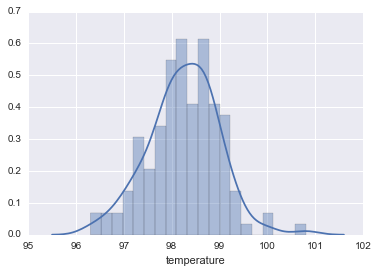

In [39]:
sns.distplot(temp, bins=20)

# Normaltest shows that Body temperature data is normally distributed:

Ho: Body temp is normally distributed

Ha: Body temp is NOT normally distributed

* Confidence Interval(CI) assumed = 95%, therefore reject HO if p < 0.05


* normaltest returns a 2-tuple of the chi-squared statistic, and the associated p-value. Given the null hypothesis that x came from a normal distribution, the p-value represents the probability that a chi-squared statistic that large (or larger) would be seen.
* If the p-val is very small, it means it is unlikely that the data came from a normal distribution.
* In below code you can see that the p-value is 0.26.
* If assume 95% confidence interval, then if p < 0.05, we should reject the null hypothesis. The p-value of 0.26 is greater than 0.05, therefore we do not reject the Ho, and that means that the distribution of body temperature is normal.

In [40]:
stats.normaltest(temp)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

# Shapiro test also shows that data is normally distributed:
* p value is 0.233, which is greater than 0.05

In [41]:
stats.shapiro(temp)

(0.9865769743919373, 0.2331680953502655)

# Question # 2:  Is the true population mean really 98.6 degrees F?
* Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?

Ho: Mu = 98.6 F

Ha: Mu != 98.6 F

* Confidence Interval(CI) assumed = 95%, therefore reject HO if p < 0.05
* Confidence Interval(CI) assumed = 99%, therefore reject HO if p < 0.01


If we assume that Ho is true, what is the probability of getting a Mu that is not equal to 98.6 F?


# Question # 2a:  In this situation, is it approriate to apply a z-test or a t-test?
* A z-test would be appropriate if these 2 conditions are met:  1) I know the standard deviation of the population, and 2)  The sample size is above 30.
* Since I do not know the population standard deviation, then a t-test should be used.

# Question # 2b:  How will the result be different?
* If I knew the population standard deviation and sample was greater than 30, I would use a z-test because it would be more accurate than a t-test.  With a t-test, since you are using the sample standard deviation as an **estimate** of the population standard deviation, then it is just an approximation of how the population behaves.


# Is the true population mean really 98.6 degrees F?

* Below here you can see the code where I ran a t-test, and the test statistic is -5.45. 
* In other words, the sample mean is -5.45 standard deviations below the null hypothesis mean of 98.6 F (recall that the sample mean of the temp dataframe is 98.249231 F, which is less than the Ho mean of 98.6 F)
* The formula to calculate the t-statistic is:  
t = Sample Mean - Ho Mean / standard error of the mean
* standard error of the mean = (standard deviation of sample / square root of number of observations)
* t = 98.249231 - 98.6 / ( 0.733183 / sqrt(130))

In [68]:
# Alternative scypy function to calculate t statistic and pvalue:

stats.ttest_1samp(temp, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

# Calculate Degrees of Freedom:

In [43]:
DOF = len(temp) - 1
DOF

129

# We can calculate the chances of seeing a result as extreme as the one we observed (known as the p-value) by passing the t-statistic in as the quantile to the stats.t.cdf() function:

In [44]:
stats.t.cdf(x= -5.4548232923645195,      # T-test statistic
               df= 129) * 2              # multiply by 2 since the sample could differ in either positive or negative direction

2.4106320415561276e-07

* Notice that this result of _2.4106e-07_ matches the pvalue result using the Ttest_1sampResult function above.
* A p-value of 2.4106e-07 means we'd expect to see data as extreme as our sample due to chance about 0.0000241% of the time if the null hypothesis was true. 

# Answer Question 1:

* **In this case, the p-value is lower than our significance level α (equal to 1-conf.level or 0.05) so we should reject the null hypothesis.  In other words, the true population mean temperature is not 98.6 degrees F.** 


# Question # 3:  At what temperature should we consider someone's temperature to be "abnormal"?
* Start by computing the margin of error and confidence interval.

In [59]:
# Calculate Standard Error:

Standard_Error = temp.std()/math.sqrt(130)  # Sample stdev/sample size
Standard_Error

0.06430441683789101

In [60]:
# Alternative way to calc standard error:

stderr = stats.sem(temp)
stderr

0.064304416837891024

* **The 95% confidence interval is (98.122, 98.376) as shown in below code:**

# ANSWER Question 2: 
* **Any temperature outside this range would be considered "abnormal"**
* FYI, also this CI does not capture the Ho mean of 98.6 F

In [45]:
stats.t.interval(0.95,                        # Confidence level
                 df = 129,                    # Degrees of freedom
                 loc = temp.mean(),           # Sample mean
                 scale= sigma)                # Standard dev estimate

(98.122002905608042, 98.376458632853513)

In [61]:
# Alternative way to compute the 95% confidence interval:

import statsmodels.stats.api as sms

sms.DescrStatsW(temp).tconfint_mean()

(98.122002905608042, 98.376458632853513)

# ANSWER Question 2b:
* **If we use a 99% confidence interval then the range is (98.081, 98.417), and any temp outside this range would be "abnormal**
*  This range also does not capture the mean of 98.6F**.

In [46]:
sigma = temp.std()/math.sqrt(130)  # Sample stdev/sample size

stats.t.interval(0.99,                        # Confidence level
                 df = 129,                    # Degrees of freedom
                 loc = temp.mean(),           # Sample mean
                 scale= sigma)                # Standard dev estimate

(98.08110824239759, 98.417353296063965)

# Question # 4:  Is there a significant difference between males and females in normal temperature?
* Set up and solve for a two sample hypothesis testing.

In [74]:
males = df[df['gender'] == 'M']
malestemp = males['temperature']

In [75]:
females = df[df['gender'] == 'F']
femalestemp = females['temperature']

# Set up Hypothesis test

Ho: The mean of malestemp is equal to the mean of femalestemp; 
* reject Ho if p < 0.05 (95% CI)

Ha: The mean of malestemp is NOT EQUAL to the mean of femalestemp


The below code shows that the two sample test yields a p-value of 0.023938, which means there is a 2% chance we'd see sample data this far apart if the two groups tested are actually identical. 

# ANSWER Question 4:
* Using a  95% confidence level we would reject the null hypothesis, since the p-value is less than the corresponding significance level of 5%.  In other words, the mean of male temperatures is NOT equal to the mean of female temperatures
* However if we used a 99% confidence level, we could not reject the null hypothesis because the probability of 0.0239 is not less than 0.01.  In other words, the mean of male temperature is equal to the mean of female temperatures

In [76]:
stats.ttest_ind(a= malestemp,
                b= femalestemp,
                equal_var=False)    # Assume samples have equal variance?        

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)